## Multirate Signal Processing - Seminar 1

4-band filterbank using scipy remez function on audio. 

Import the necessary libraries first.

In [1]:
import numpy as np
import sound
import scipy.signal as sig
import scipy.io.wavfile as wav
import pyaudio
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,6]

Load audio file from folder data.

In [2]:
pathToAudio = "data/Track48.wav"
fs, data = wav.read(pathToAudio)
duration = 5 # seconds
audio = np.array(data[:fs*duration,0]) # use only one channel
print('Sampling rate: {}'.format(fs))
print('Data Type: ', audio.dtype)
print('Shape of one channel: {}'.format(audio.shape))

Sampling rate: 44100
('Data Type: ', dtype('int16'))
Shape of one channel: (220500,)


View spectrum of original signal

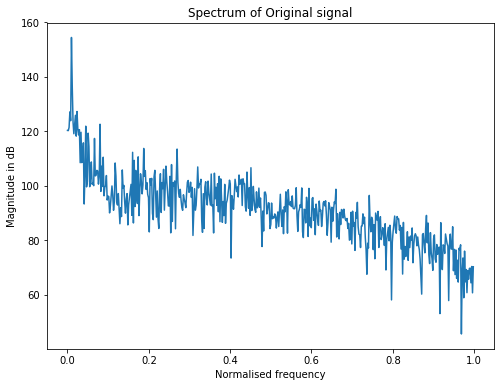

In [23]:
w,H = sig.freqz(audio)
plt.plot(w/np.pi,20*np.log10(np.abs(H)))
plt.title('Spectrum of Original signal')
plt.xlabel('Normalised frequency')
plt.ylabel('Magnitude in dB')
plt.show()

### Task 1

Create filterbank using remez function.

In [4]:
filterTabs = 32
filterbank = []
#lowpass
filterbank.append(sig.remez(filterTabs,[0, 0.115, 0.135, 0.5],[1 , 0],[1, 1000]))
# bandpass low
filterbank.append(sig.remez(filterTabs,[0, 0.115, 0.135, 0.24, 0.26, 0.5],[0, 1 , 0],[1000, 1, 1000]))
# bandpass high
filterbank.append(sig.remez(filterTabs,[0, 0.24, 0.26, 0.365, 0.385, 0.5],[0, 1 , 0],[1000, 1, 1000]))
#highpass
filterbank.append(sig.remez(filterTabs,[0, 0.365, 0.385, 0.5],[0, 1],[1000, 1]))

Apply 4-band filterbank

In [5]:
decomposed = [np.convolve(h,audio,mode='same') for h in filterbank]

Playback subbands:

In [6]:
i = 1
for band in decomposed:
    print("Playing {}th subband.".format(i))
    sound.sound(band,fs)
    i += 1

Playing 1th subband.
* done
Playing 2th subband.
* done
Playing 3th subband.
* done
Playing 4th subband.
* done


Downsampling of bands:

In [8]:
# downsampledBands = [s[i::4] for i,s in zip([0,1,2,3], decomposed)]
downsampledBands = [s[::4] for s in decomposed]

Playback of of downsampled at fs/4 sampling frequency:

In [9]:
i = 1
fs_ds = fs/4
for band in downsampledBands:
    print("Playing {}th subband.".format(i))
    sound.sound(band,fs_ds)
    i += 1

Playing 1th subband.
* done
Playing 2th subband.
* done
Playing 3th subband.
* done
Playing 4th subband.
* done


### Task 2

Plot filter impulse responses in one window

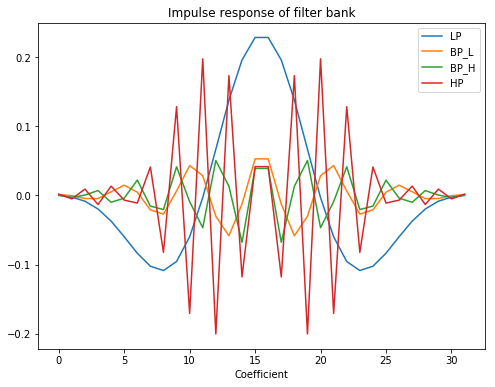

In [24]:
f1 = plt.figure()
for h in filterbank:
    plt.plot(h)
plt.legend(['LP','BP_L','BP_H','HP'])
plt.title('Impulse response of filter bank')
plt.xlabel('Coefficient')
plt.show()

Plot filter frequency responses:

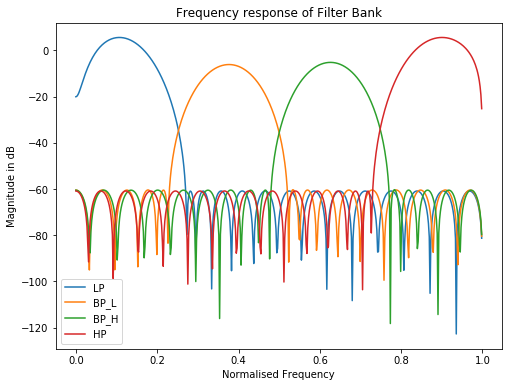

In [25]:
for h in filterbank:
    w,H = sig.freqz(h)
    # plot magnitude
    plt.plot(w/np.pi,20*np.log10(np.abs(H)))
plt.legend(['LP','BP_L','BP_H','HP'])
plt.title('Frequency response of Filter Bank')
plt.xlabel('Normalised Frequency')
plt.ylabel('Magnitude in dB')
plt.show()

Plot spectra of signal:

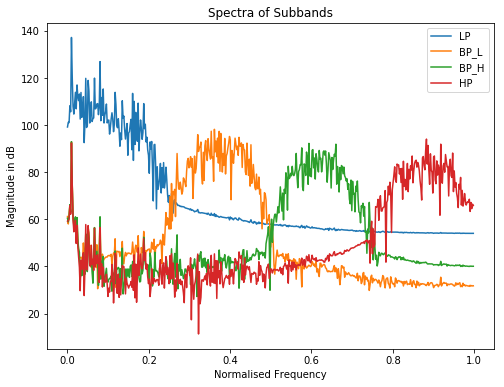

In [24]:
for s in decomposed:
    w,H = sig.freqz(s)
    # plot magnitude
    plt.plot(w/np.pi,20*np.log10(np.abs(H)))

plt.legend(['LP','BP_L','BP_H','HP'])
plt.title('Spectra of Subbands')
plt.xlabel('Normalised Frequency')
plt.ylabel('Magnitude in dB')
plt.show()

Plot signals:

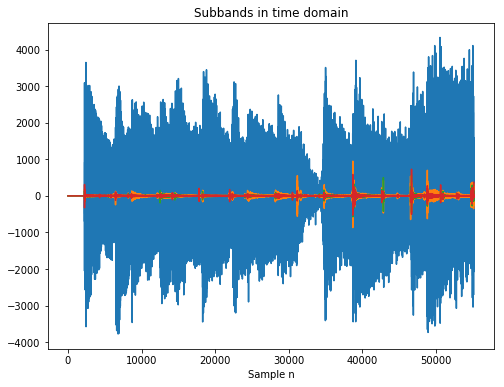

In [26]:
for s in downsampledBands:
    plt.plot(s)
plt.title('Subbands in time domain')
plt.xlabel('Sample n')
plt.show()

### Task 3 

Reconstruction of audio

Upsample to original sampling rate:

In [17]:
zeroBands = [np.zeros_like(band) for band in decomposed]
usBands = []
for zBand, dsBand in zip(zeroBands, downsampledBands):
    zBand[::4] = dsBand
    usBands.append(zBand)

Filter signals

In [18]:
filterdUs = [np.convolve(h,band,mode='same') for h,band in zip(filterbank, usBand)]

Reconstruct by adding subbands up:

In [19]:
recon = np.zeros_like(decomposed[0])
for band in filterdUs:
    recon += band
sound.sound(recon,fs)

* done


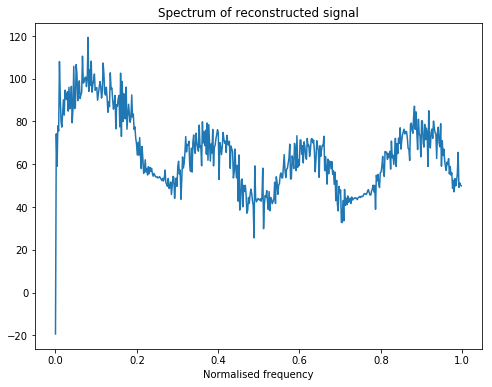

In [27]:
w,H = sig.freqz(recon)
plt.plot(w/np.pi,20*np.log10(np.abs(H)))
plt.title('Spectrum of reconstructed signal')
plt.xlabel('Normalised frequency')
plt.show()

In [ ]:
plt.plot(recon)
plt.show()